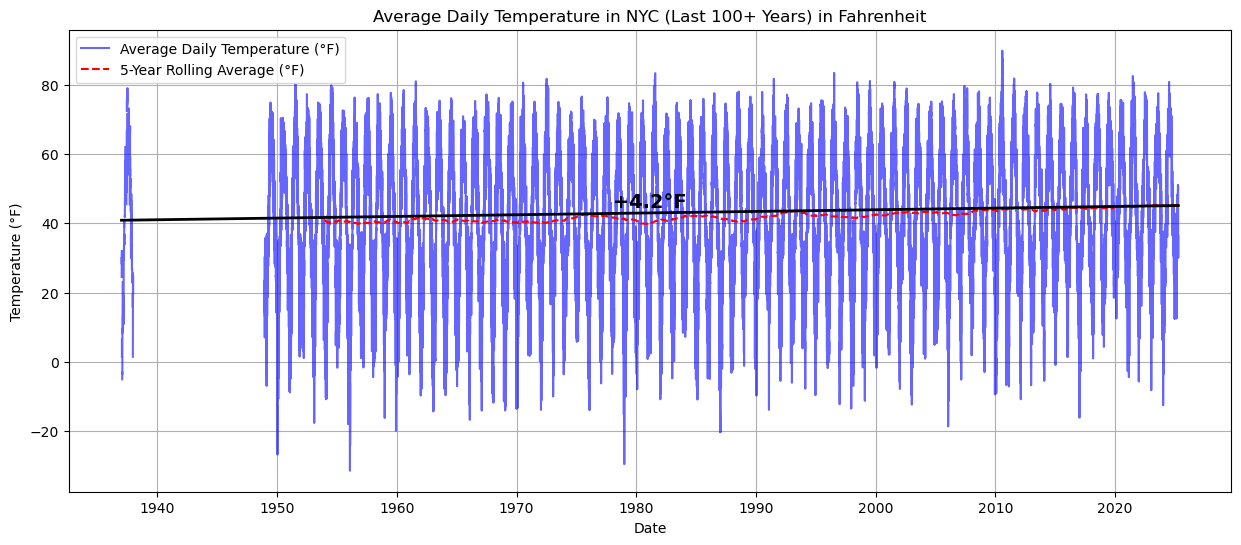

In [100]:
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily

# NYC coordinates
nyc = Point(40.7128, -74.0060)
london = Point(51.5074, -0.1278)
tokyo = Point(35.6762, 139.6503)
sydney = Point(-33.8688, 151.2093)
paris = Point(48.8566, 2.3522)
berlin = Point(52.52, 13.4050)
cape_town = Point(-33.9249, 18.4241)
mumbai = Point(19.0760, 72.8777)
rio = Point(-22.9068, -43.1729)
toronto = Point(43.65107, -79.347015)
moscow = Point(55.7558, 37.6173)

start = datetime(1800, 1, 1)
end = datetime.today()

# Fetch daily data for NYC
data = Daily(moscow, start, end)
df = data.fetch()

# Convert 'tmid' from Celsius to Fahrenheit
df['tmax_f'] = (df['tmax'] * 9/5) + 32
df['tmin_f'] = (df['tmin'] * 9/5) + 32
df['tmid'] = (df['tmax_f'] + df['tmin_f']) / 2

# Apply a rolling average (e.g., 5 years) to smooth out the curve
# Ensure that the rolling average starts only after 5 full years of data
df['tmid_f_rolling'] = df['tmid'].rolling(window=365 * 5, min_periods=365 * 5).mean()  # 5-year rolling average

# Get the earliest rolling average temperature (first data point)
earliest_temp = df['tmid_f_rolling'].dropna().iloc[0]  # Drop NaN values from the early period

# Get the latest rolling average temperature (last data point)
latest_temp = df['tmid_f_rolling'].iloc[-1]

# Calculate the temperature change from the earliest to the latest
temp_change = latest_temp - earliest_temp

# Plot the temperature trend with smoothing
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['tmid'], label='Average Daily Temperature (°F)', color='blue', alpha=0.6)
plt.plot(df.index, df['tmid_f_rolling'], label='5-Year Rolling Average (°F)', color='red', linestyle='--')

# Plot the black line to track the temperature change from the earliest to the latest
plt.plot([df.index[0], df.index[-1]], [earliest_temp, latest_temp], color='black', linestyle='-', lw=2)

# Adjusted label position: above the midpoint of the line
midpoint_y = (earliest_temp + latest_temp) / 2 + 0.5  # Slightly above the midpoint
plt.text(df.index[int(len(df) / 2)], midpoint_y, f'+{temp_change:.1f}°F', 
         horizontalalignment='center', verticalalignment='bottom', 
         color='black', fontsize=14, fontweight='bold')

# Add title, labels, and legend
plt.title('Average Daily Temperature in NYC (Last 100+ Years) in Fahrenheit')
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


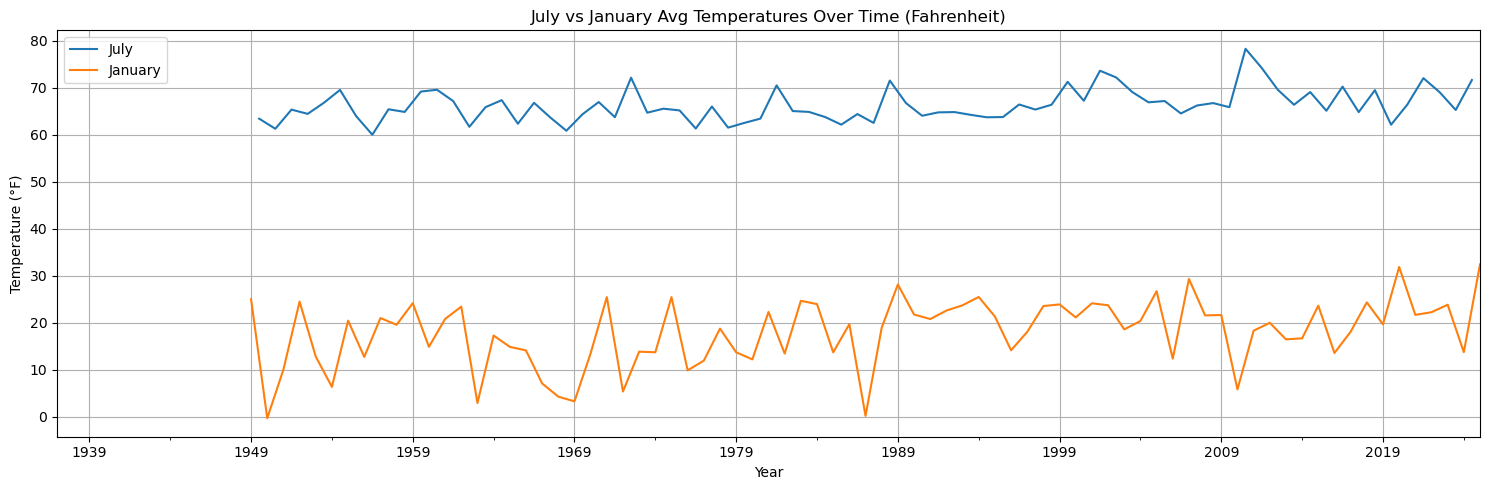

In [91]:
monthly_avg = df.resample('ME').mean()

monthly_avg['tavg_f'] = ((monthly_avg['tmax']+monthly_avg['tmin'])/2 * 9/5) + 32

plt.figure(figsize=(15, 5))
monthly_avg['tavg_f'].loc[monthly_avg.index.month == 7].plot(label='July')
monthly_avg['tavg_f'].loc[monthly_avg.index.month == 1].plot(label='January')

plt.title("July vs January Avg Temperatures Over Time (Fahrenheit)")
plt.ylabel("Temperature (°F)")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

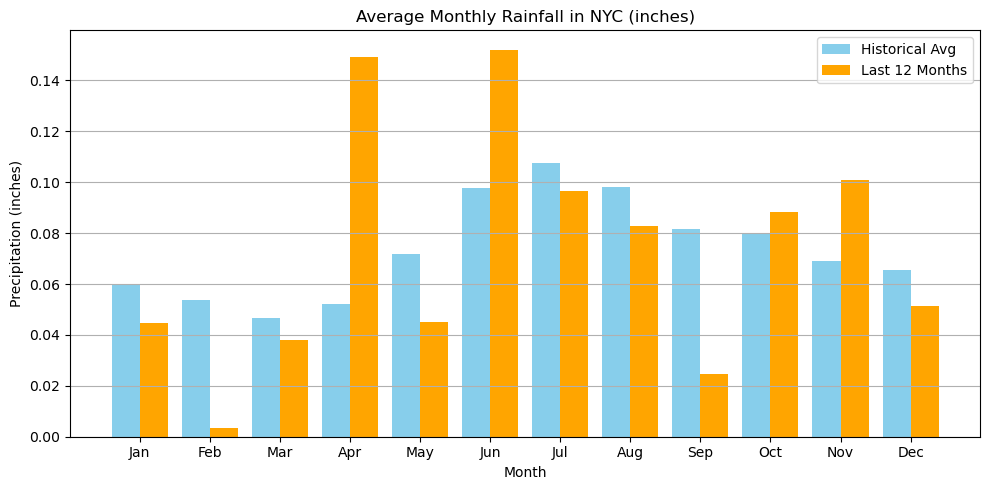

In [94]:
from datetime import timedelta

# Convert precipitation to inches
df['prcp_in'] = df['prcp'] / 25.4

# Group by calendar month over all years
avg_by_month_all_years = df['prcp_in'].groupby(df.index.month).mean()
# Filter last 12 months using .loc
end_date = df.index.max()
start_date = end_date - timedelta(days=365)
last_12_months = df.loc[start_date:end_date]
avg_by_month_recent = last_12_months['prcp_in'].groupby(last_12_months.index.month).mean()

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.4
months = range(1, 13)

# All-time average
plt.bar([m - bar_width/2 for m in months], avg_by_month_all_years, 
        width=bar_width, label='Historical Avg', color='skyblue')

# Last 12 months average
plt.bar([m + bar_width/2 for m in months], avg_by_month_recent, 
        width=bar_width, label='Last 12 Months', color='orange')

# Labels
plt.title('Average Monthly Rainfall in NYC (inches)')
plt.xlabel('Month')
plt.ylabel('Precipitation (inches)')
plt.xticks(ticks=months, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

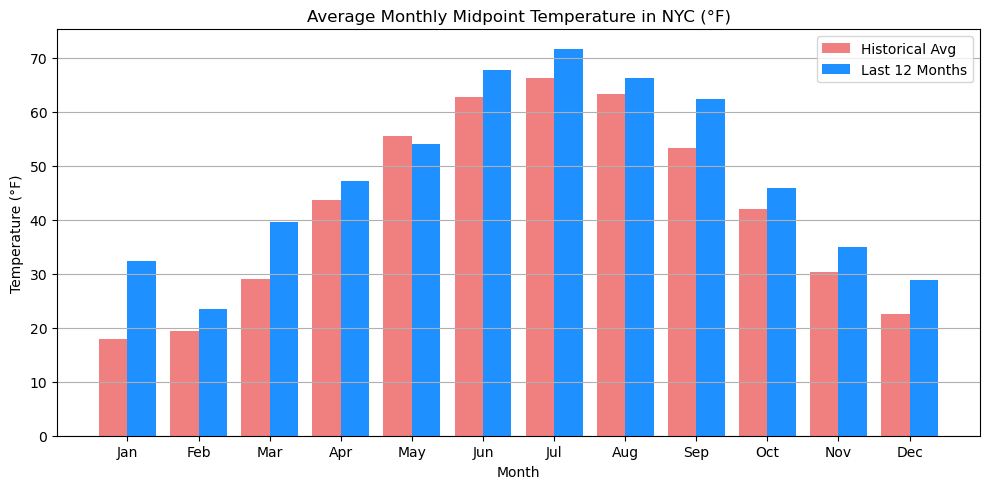

In [96]:
from datetime import timedelta

# Convert tmin and tmax to Fahrenheit
df['tmin_f'] = (df['tmin'] * 9/5) + 32
df['tmax_f'] = (df['tmax'] * 9/5) + 32

# Calculate daily midpoint temperature in Fahrenheit
df['tavg_f'] = (df['tmin_f'] + df['tmax_f']) / 2

# Group by calendar month over all years
avg_monthly_all_years = df['tavg_f'].groupby(df.index.month).mean()

# Filter last 12 months using .loc
end_date = df.index.max()
start_date = end_date - timedelta(days=365)
last_12_months = df.loc[start_date:end_date]
avg_monthly_recent = last_12_months['tavg_f'].groupby(last_12_months.index.month).mean()

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.4
months = range(1, 13)

# All-time average
plt.bar([m - bar_width/2 for m in months], avg_monthly_all_years, 
        width=bar_width, label='Historical Avg', color='lightcoral')

# Last 12 months average
plt.bar([m + bar_width/2 for m in months], avg_monthly_recent, 
        width=bar_width, label='Last 12 Months', color='dodgerblue')

# Labels
plt.title('Average Monthly Midpoint Temperature in NYC (°F)')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.xticks(ticks=months, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

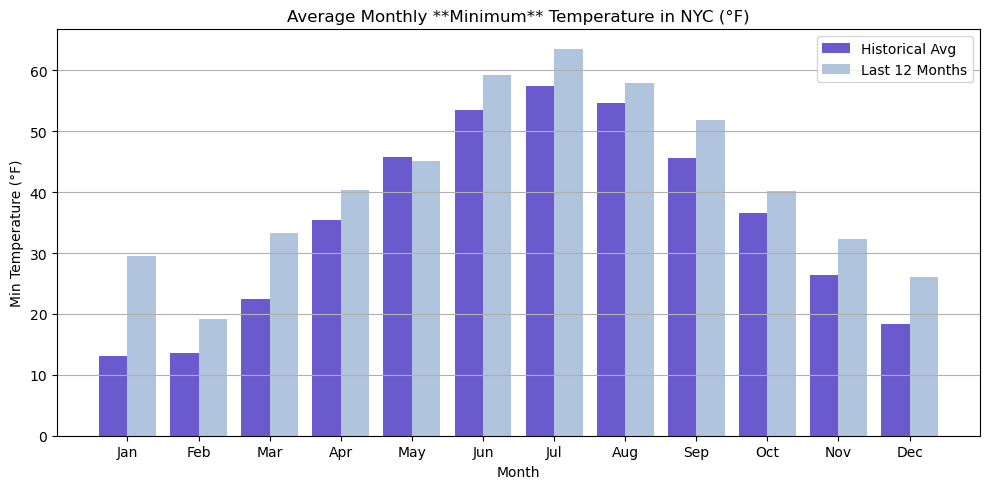

In [98]:
# Group by calendar month over all years (min temp)
avg_min_monthly_all_years = df['tmin_f'].groupby(df.index.month).mean()
avg_min_monthly_recent = last_12_months['tmin_f'].groupby(last_12_months.index.month).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.bar([m - bar_width/2 for m in months], avg_min_monthly_all_years,
        width=bar_width, label='Historical Avg', color='slateblue')
plt.bar([m + bar_width/2 for m in months], avg_min_monthly_recent,
        width=bar_width, label='Last 12 Months', color='lightsteelblue')

plt.title('Average Monthly **Minimum** Temperature in NYC (°F)')
plt.xlabel('Month')
plt.ylabel('Min Temperature (°F)')
plt.xticks(ticks=months, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

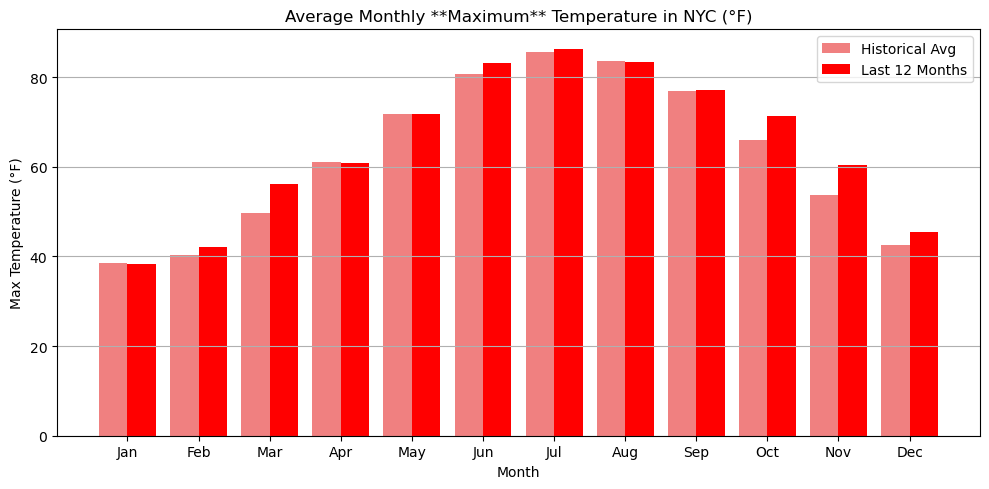

In [78]:
# Group by calendar month over all years (max temp)
avg_max_monthly_all_years = df['tmax_f'].groupby(df.index.month).mean()
avg_max_monthly_recent = last_12_months['tmax_f'].groupby(last_12_months.index.month).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.bar([m - bar_width/2 for m in months], avg_max_monthly_all_years,
        width=bar_width, label='Historical Avg', color='lightcoral')
plt.bar([m + bar_width/2 for m in months], avg_max_monthly_recent,
        width=bar_width, label='Last 12 Months', color='red')

plt.title('Average Monthly **Maximum** Temperature in NYC (°F)')
plt.xlabel('Month')
plt.ylabel('Max Temperature (°F)')
plt.xticks(ticks=months, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [2]:
# print(df)

NameError: name 'df' is not defined